In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("data.csv",parse_dates=["posted","scraped"])

df["weekday"] = df.posted.dt.day_name()
df["target"] = np.log(df.upvotes+1)

df["title_length"] = df.title.apply(lambda x: len(x.split(" ")))

df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test,weekday,target,title_length
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False,Saturday,5.513429,4
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False,Saturday,3.218876,2
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False,Friday,6.059123,4
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False,Friday,5.283204,3
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False,Friday,6.431331,13


In [9]:
df["length"] = df.title_length.astype(str)

In [10]:
for i in range(3):
    
    df.loc[(df.title_length>=(5*i+15))&(df.title_length<(5*i+20)),"length"] = f'{5*i+15}-{5*i+19}'

In [11]:
for i in range(4):
    
    df.loc[(df.title_length>=(10*i+30))&(df.title_length<(10*i+40)),"length"] = f'{10*i+30}-{10*i+39}'

In [12]:
df["target"] -= df.target.mean()
df["target"] /= df.target.std()

In [13]:
df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test,weekday,target,title_length,length
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False,Saturday,0.921083,4,4
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False,Saturday,-0.802065,2,2
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False,Friday,1.330884,4,4
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False,Friday,0.748190,3,3
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False,Friday,1.610403,13,13


In [14]:
subjects = {"holiday":["santa","xmas","christmas","holiday","valentine","halloween","easter","thanksgiving"]
           ,"death/injury":["rip","broke her","broke his","hard time bending ","not feeling so good","not feeling well","the labs gone","splenectomy","post op","passed away","miss her","miss him","surgery","seizure","missing","hospital","hit by car","died"]
           ,"sleep":["comfy","exhausted","tuckered","yawn","relax","cozy","cuddly","chill","dreaming","lazy","bed time","bedtime","slumber","lazing","blanket","snooze","sleepy","snug ","sleep","cuddlin","tired","snoozin","loungin","snuggle","cuddle","chillin","sweepy","leisure","nappin","nap ","nap,"]
           ,"new":["new add","rescued","newest","just adopted","welcome to the fam"]
            ,"sun":["sunny","beach","enjoying morning sun","soaking up the sun","enjoying the sun","sunshine","enjoying the shade","in the sun","sunbeam","sun beam"]
           ,"snow":["snow","winter","cold","-3"]
           ,"attributes":["tail","bean","paw","face","eyes","snoot"]
           ,"playful":["game of tag","zoomies","play","fetch","tug"]
           ,"birthday":["birthday"]
#            ,"naughty":["naughty","bad girl","bad boy"]
#            ,"poses":["pose","photogenic","photoshoot"]
           ,"walk":["walk","stroll","leash","hike"]
            ,"greeting":["good morning","good evening","good night","Good murrrrning"]+[f'happy {wk.lower()}' for wk in df.weekday.unique()]
           ,"cute":["baby","babies","goodest","adorable","beautiful","cutie","cute","handsome"]
           }


def label(x):
    
    for subject,keywords in subjects.items():
        
        for kw in keywords:
            if kw in x.lower():
                return subject
            
    return "Other"

df["subject"] = df.title.apply(label)

df.subject.value_counts()

Other           41213
sleep            5360
cute             3423
attributes       1829
holiday          1561
snow             1018
death/injury      840
walk              727
sun               653
playful           605
birthday          567
new               345
greeting          271
Name: subject, dtype: int64

In [29]:
df_grouped.columns.droplevel(level=0)

Index(['', 'mean', 'count'], dtype='object')

In [30]:
df_grouped = df.groupby(["length"],as_index=False).agg({"target":"mean","subject":"count"})
df_grouped

,length,target,subject
0,1,-0.187703,2155
1,10,0.070303,2434
2,11,0.095137,1991
3,12,0.105604,1755
4,13,0.034315,1390
5,14,0.088246,1306
6,15-19,0.087426,3969
7,2,-0.111476,5018
8,20-24,0.102734,1780
9,25-29,0.022712,957


In [63]:
df[["category","subreddit","title","target","posted","scraped","title_length","length","subject"]].to_csv("appdata/caption.csv",index=False)

<AxesSubplot:xlabel='length', ylabel='target'>

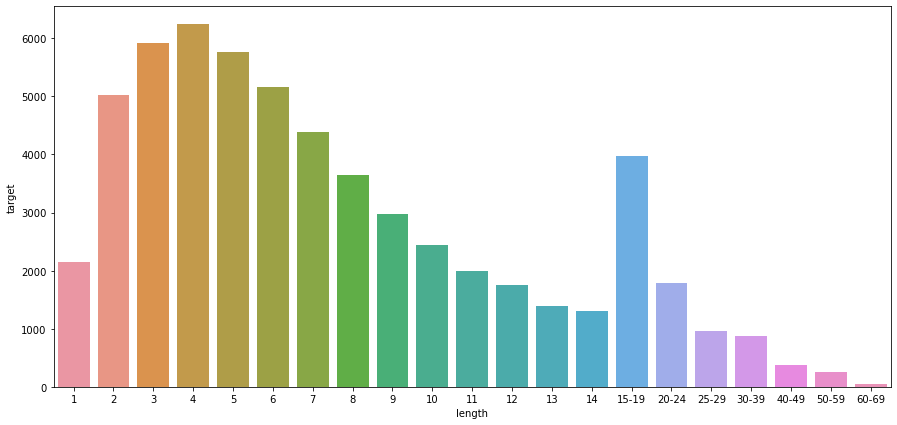

In [7]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df,x="length",y="target",estimator=len,order=df.sort_values("title_length").length.unique())

<AxesSubplot:xlabel='length', ylabel='target'>

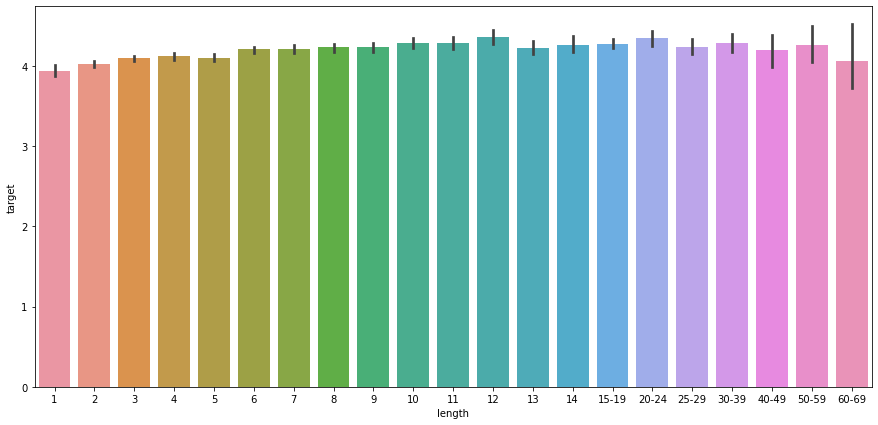

In [8]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df,x="length",y="target",estimator=np.median,order=df.sort_values("title_length").length.unique())

In [31]:
test = df[df.test]
train = df[~df.test]

test["target"] -= train.target.mean()
test["target"] /= train.target.std()
train["target"] -= train.target.mean()
train["target"] /= train.target.std()

C:\Users\alexi\AppData\Local\Temp/ipykernel_15940/2966662935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["target"] -= train.target.mean()
C:\Users\alexi\AppData\Local\Temp/ipykernel_15940/2966662935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["target"] /= train.target.std()
C:\Users\alexi\AppData\Local\Temp/ipykernel_15940/2966662935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [44]:
df.length.value_counts(normalize=True).reset_index().rename(columns={"length":"counts","index":"length"})

,length,counts
0,4,0.106793
1,3,0.101178
2,5,0.098713
3,6,0.088441
4,2,0.085907
5,7,0.074950
6,15-19,0.067948
7,8,0.062470
8,9,0.050897
9,10,0.041670


<AxesSubplot:xlabel='length', ylabel='target'>

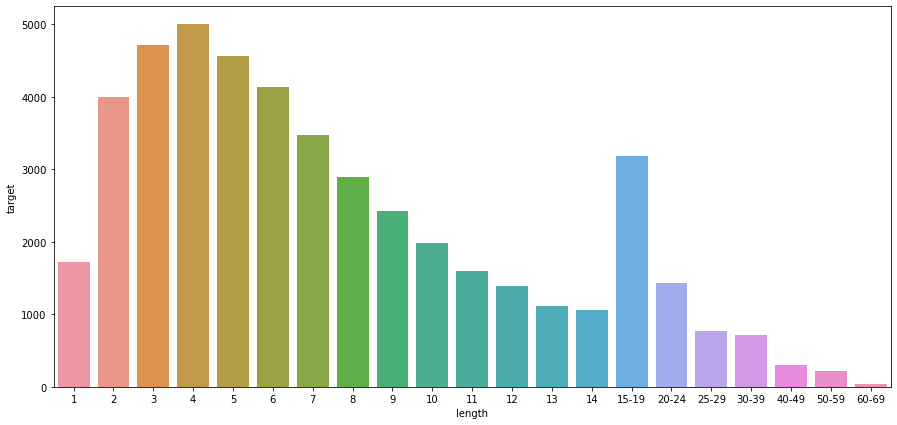

In [10]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=train,x="length",y="target",estimator=len,order=df.sort_values("title_length").length.unique())

In [33]:
df.category.unique()

array(['cats', 'dogs'], dtype=object)

<AxesSubplot:xlabel='length', ylabel='target'>

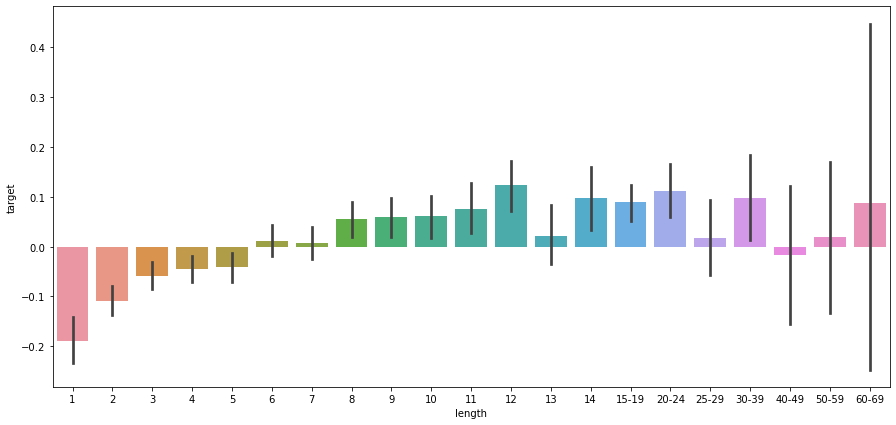

In [32]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=train,x="length",y="target",order=df.sort_values("title_length").length.unique())

<AxesSubplot:xlabel='length', ylabel='upvotes'>

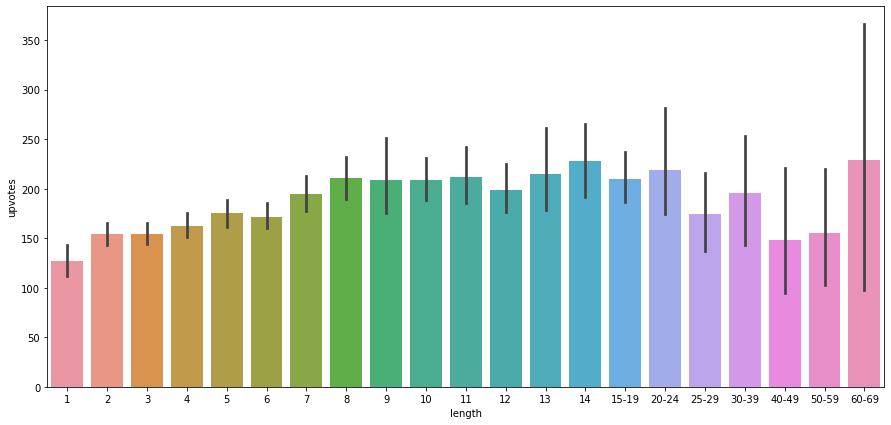

In [33]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=train[train.category=="cats"],x="length",y="upvotes",order=df.sort_values("title_length").length.unique())

<AxesSubplot:xlabel='length', ylabel='upvotes'>

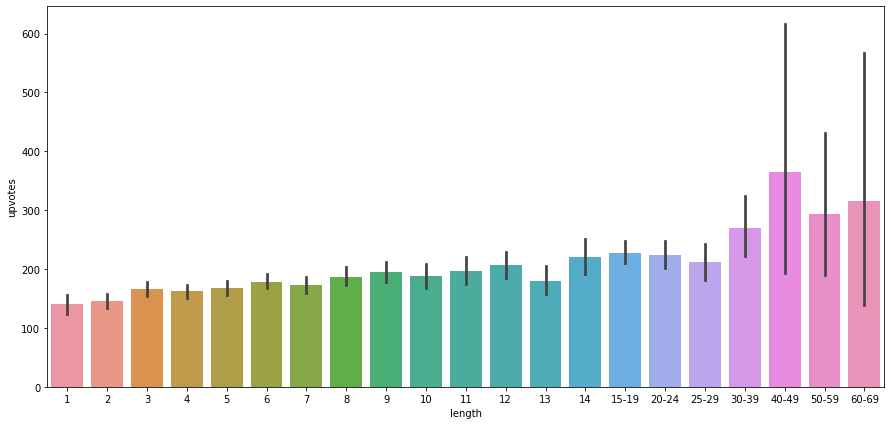

In [36]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=train[train.category=="dogs"],x="length",y="upvotes",order=df.sort_values("title_length").length.unique())

<AxesSubplot:xlabel='length', ylabel='target'>

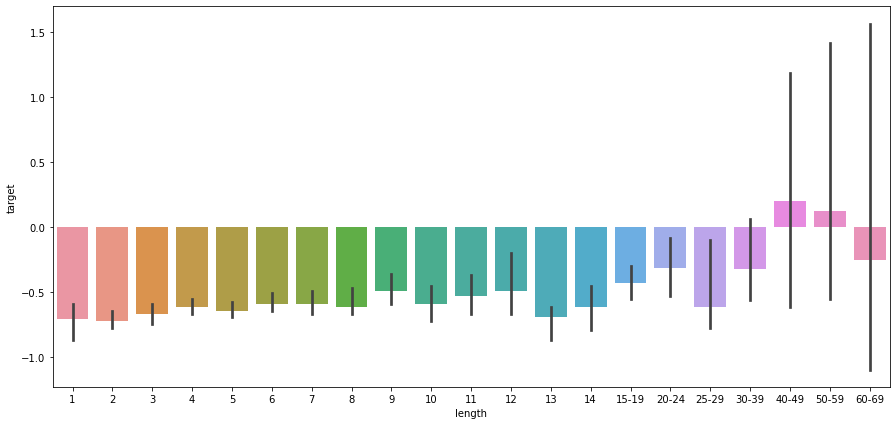

In [26]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=train[(train.niche==False)&(train.category=="dogs")],x="length",y="target",estimator=np.median,order=df.sort_values("title_length").length.unique())

In [81]:
data = df.value_counts(subset="subject",normalize=True).to_frame().reset_index().rename(columns={0:"percent"})
data

,subject,percent
0,Other,0.705557
1,sleep,0.091762
2,cute,0.058601
3,attributes,0.031312
4,holiday,0.026724
5,snow,0.017428
6,death/injury,0.014381
7,walk,0.012446
8,sun,0.011179
9,playful,0.010357


<BarContainer object of 13 artists>


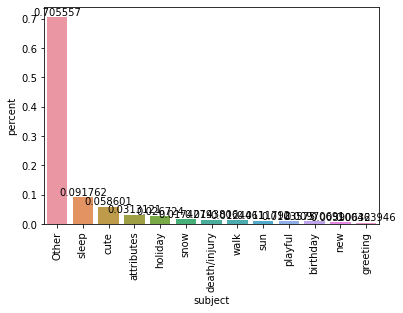

In [86]:
ax = sns.barplot(data=data,x="subject",y="percent")
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90);

In [90]:
ax.containers[0][0][0]

TypeError: 'Rectangle' object is not subscriptable

In [59]:
import plotly.express as px

In [62]:
data = df.groupby(["subject"],as_index=False).agg({"target":"count"}).rename(columns={"target":"posts"})

fig = px.pie(data, values='posts', names='subject', title='Population of European continent')
fig.show()

In [45]:
df.groupby(["category"]).agg({"title_length":"mean"})

,title_length
category,
cats,8.102760
dogs,8.714676


In [46]:
train.groupby(["category"]).agg({"target":"mean"})

,target
category,
cats,0.086715
dogs,-0.031566


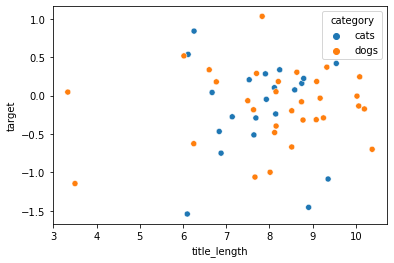

In [50]:
sns.scatterplot(data=train.groupby(["subreddit","category"],as_index=False).agg({"target":"mean","title_length":"mean"}),x="title_length",y="target",hue="category");

<AxesSubplot:xlabel='title_length', ylabel='target'>

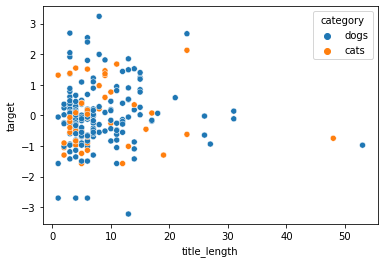

In [56]:
sns.scatterplot(data=train.sample(200),x="title_length",y="target",hue="category")

<AxesSubplot:xlabel='title_length', ylabel='category'>

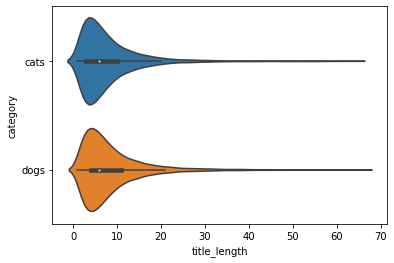

In [53]:
sns.violinplot(data=train,x="title_length",y="category")